# Assignment 3.1: Eigenmodes

This code runs part 3.1 of Assignment 3: Eigenmodes of drums or membranes of different shapes

In [ ]:
import src.diagonal_matrix as dm

from IPython.display import HTML, display

import numpy as np
import time

import numpy as np
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### 1.1 Matrix of eigenvalue problem

The following function creates a diagonal Matrix for the eigenvalue problem with Dirichlet boundary conditions.

In [ ]:
# L is the size of the domain and dx is the size of a discretization
# so total number of discretizations (steps) is L/dx
L = 1
dx = 1/4
steps = int(L/dx)

diag_M = dm.diagonal_matrix(steps)

print(diag_M)

Note: It may not be visible on the output, but the 4th position from (-4) in either direction contains a 1 such that: [..., 0, 1, 0, 0, 1, -4, 1, 0, 0, 1, 0, ...]. Except for the boundary, each row/column will contain 5 entries, alligning with the 5-point-stencil. 

We can visualize this matrix with the following function. Note that for larger values of steps, you should pass the parameter text='OFF'. 

In [ ]:
fig = dm.visualize_diag_matrix(diag_M, steps)

We can also visualise the matrix of the circular and rectangular grid

In [ ]:
# Rectangular (L by 2L)

diag_M = dm.diagonal_rectangular(steps)
fig = dm.visualize_diag_matrix(diag_M, steps, text='OFF')

In [ ]:
# Circular 
L = 1
dx = 1/9
steps = int(L/dx)

diag_M = dm.diagonal_matrix(steps)
grid = dm.circular_domain(steps)
diag_M = dm.diagonal_circle(grid, diag_M, steps)

fig = dm.visualize_diag_matrix(diag_M, steps, text='OFF')


### 1.2 Eigenmodes

We can now get and visualise the eigenmodes with the following function. We will take a larger matrix to better visualise it. Note that high values of steps and multiple modes will take longer to run.

In [ ]:
# Number of modes to display
modes = 6
L = 1
dx = 1/50
steps = int(L/dx)

diag_M = dm.diagonal_matrix(steps)

eigenvalues, _, _, eigenmodes = dm.get_eigenmodes(diag_M, L, dx, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, L, modes)


### 1.3 Eigenmodes of Rectangular and Circular grid

In [ ]:
# Rectangular
modes = 6
L = 1
dx = 1/50
steps = int(L/dx)

# Rectangular (L by 2L)
diag_M = dm.diagonal_rectangular(steps)

# Number of rows/columns
eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, L, dx, modes)
dm.visualize_rectangular_modes(eigenmodes, eigenvalues, L, modes)


In [ ]:
# Circular
L = 1
dx = 1/49
steps = int(L/dx)
modes = 6

diag_M = dm.diagonal_matrix(steps)
grid = dm.circular_domain(steps)
diag_M = dm.diagonal_circle(grid, diag_M, steps) 

eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, L, dx, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, L, modes)


We can also plot the eigenfrequencies. This results in similar patterns. Note that to run this, please uncomment the visualisation function as it may run for several minutes, or change N to a lower value. 

In [ ]:
L = 1
dx = 1/50
steps = int(L/dx)

dm.visualize_all_eigenfrequencies(L, dx)

### C. Speed of different eigenvalue solvers.

This code compared the speed of scipy.linalg.eigh() to the speed of scipy.sparse.linalg.eigs() for all three domain shapes.

In [ ]:
modes = 6
L = 1
dx = 1/50
steps = int(L/dx)

# Time for square 
diag_M = dm.diagonal_matrix(steps)

start_time = time.perf_counter() # Start Time Square reg
dm.get_eigenmodes(diag_M, L, dx, modes)
end_time = time.perf_counter()  # End Time Square reg
elapsed_time = end_time - start_time
print(f"Time for regular square matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Square sparse
dm.get_eigenmodes_sparse_square(diag_M, L, dx, modes)
end_time = time.perf_counter()  # End Time Square sparse
elapsed_time = end_time - start_time
print(f"Time for sparse square matrix: {elapsed_time}")


# time for rectangle
diag_M = dm.diagonal_rectangular(steps)

start_time = time.perf_counter() # Start Time Rectangle reg
dm.get_eigenmodes_rectangular(diag_M, L, dx, modes)
end_time = time.perf_counter()  # End Time rectangle reg
elapsed_time = end_time - start_time
print(f"Time for regular rectangular matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Rectangle sparse
dm.get_eigenmodes_sparse_rectangular(diag_M, L, dx, modes)
end_time = time.perf_counter()  # End Time rectangle sparse
elapsed_time = end_time - start_time
print(f"Time for sparse rectangular matrix: {elapsed_time}")


# Time for circle
diag_M = dm.diagonal_matrix(steps)
grid = dm.circular_domain(steps)
diag_M = dm.diagonal_circle(grid, diag_M, steps) 

start_time = time.perf_counter() # Start Time Circle reg
dm.get_eigenmodes_circular(diag_M, grid, L, dx, modes)
end_time = time.perf_counter()  # End Time Circle reg
elapsed_time = end_time - start_time
print(f"Time for regular circular matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Circle sparse
dm.get_eigenmodes_sparse_circular(diag_M, grid, L, dx, modes)
end_time = time.perf_counter()  # End Time Circle sparse
elapsed_time = end_time - start_time
print(f"Time for sparse circular matrix: {elapsed_time}")

### D. Eigenfrequencies and size $L$

We look at the effect of size of the domain $L$ on the eigenfrequenciess. As the discretization step size is constant, an increase in $L$ also increases the number of discretization steps.

In [ ]:
modes = 6
list_L = [2, 4, 6, 8, 10]
dx =  1/10
dx_circular = 1/9
listlist_eigfreq = []

listlist_eigfreq.append(dm.eigenfreqs_size_square(list_L, dx, modes))
listlist_eigfreq.append(dm.eigenfreqs_size_rectangular(list_L, dx, modes))
listlist_eigfreq.append(dm.eigenfreqs_size_circular([x-1 for x in list_L], dx_circular, modes))

dm.visualise_eigenfreqs_size(list_L, listlist_eigfreq)

### E: Time-dependence

$u(x,y,t) = v(x,y) T(t)$ 

where:
- $v(x,y)$ is the eigenmode such as those found in 1.2 and 1.3
- $T(t) = A \cos(c \lambda t) + B \sin(c \lambda t)$
  where:
  - $\lambda$ is the eigenfrequency

In [ ]:
A = B = 1
c = 1
L = 1
dx = 1/50
steps = int(L/dx)

diag_M = dm.diagonal_matrix(steps)

mode = 1
eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_square_mode{mode}.gif', writer='pillow')

mode = 2
eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_square_mode{mode}.gif', writer='pillow')

mode = 3
eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_square_mode{mode}.gif', writer='pillow')

mode = 4
eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_square_mode{mode}.gif', writer='pillow')

# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=30, default_mode='loop')))

In [ ]:
# rectangular
A = B = 1
c = 1
L = 1
dx = 1/50
steps = int(L/dx)

diag_M = dm.diagonal_rectangular(steps)

mode = 1
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation_rectangular(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_rect_mode{mode}.gif', writer='pillow')

mode = 2
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation_rectangular(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_rect_mode{mode}.gif', writer='pillow')

mode = 3
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation_rectangular(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_rect_mode{mode}.gif', writer='pillow')

mode = 4
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation_rectangular(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_rect_mode{mode}.gif', writer='pillow')
# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=30, default_mode='loop')))

In [ ]:
# circular
A = B = 1
c = 1
L = 1
dx = 1/50
steps = int(L/dx)

diag_M = dm.diagonal_matrix(steps)
grid = dm.circular_domain(steps)
diag_M = dm.diagonal_circle(grid, diag_M, steps) 

mode = 1
eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_circ_mode{mode}.gif', writer='pillow')

mode = 2
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_circ_mode{mode}.gif', writer='pillow')

mode = 3
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_circ_mode{mode}.gif', writer='pillow')

mode = 4
eigenvals, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, L, dx, mode)
eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation(eigenmode, eigenfreq, mode, 2*np.pi/eigenfreq, 2*np.pi/eigenfreq/100, A, B, c)
ani.save(f'results/2Dwave_animations/2Dwave_circ_mode{mode}.gif', writer='pillow')

# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=30, default_mode='loop')))

We can also plot multiple heatmaps of the displacement of the membrane at different timesteps to insert into the report.

In [ ]:
A = B = 1
c = 1
L = 1
dx = 1/50
steps = int(L/dx)

mode = 2
diag_M = dm.diagonal_matrix(steps)

eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, L, dx, mode)

eigenfreq = np.sqrt(-eigenvals[-1])
eigenmode = eigenmodes[:, :, -1]

dm.time_dependent_visualise_square(eigenmode, eigenfreq, 2*np.pi/eigenfreq, 9, 1, 1, 1)

# Assignment 3.2: Direct Methods for Solving Diffusion Equation 

In [ ]:
import src.direct as direct 

In this section we attempt to solve the discretized diffusion equation using Direct method (LU Decomposition)

In [ ]:
N = 100  # Dimensions of the Grid to use 
radius = 2.0 # Radius of the circular domain
#Co-ordinates of the source
source_x = 0.6 
source_y = 1.2 

In [ ]:
X, Y, C = direct.solve_diffusion_direct(N, radius, source_x, source_y)

### 3.G Steady - State Concentration Plot

In [ ]:
direct.plot_solution(X, Y, C, radius, source_x, source_y)

### 3.J Analysing effect of driving frequency on Oscillatory System

In [9]:
import src.phase
import matplotlib.pyplot as plt

In [10]:
resonance_results, natural_freq = src.phase.analyze_resonance(k=1.0, driving_amplitude=0.2, time=100.0, timesteps=10000)

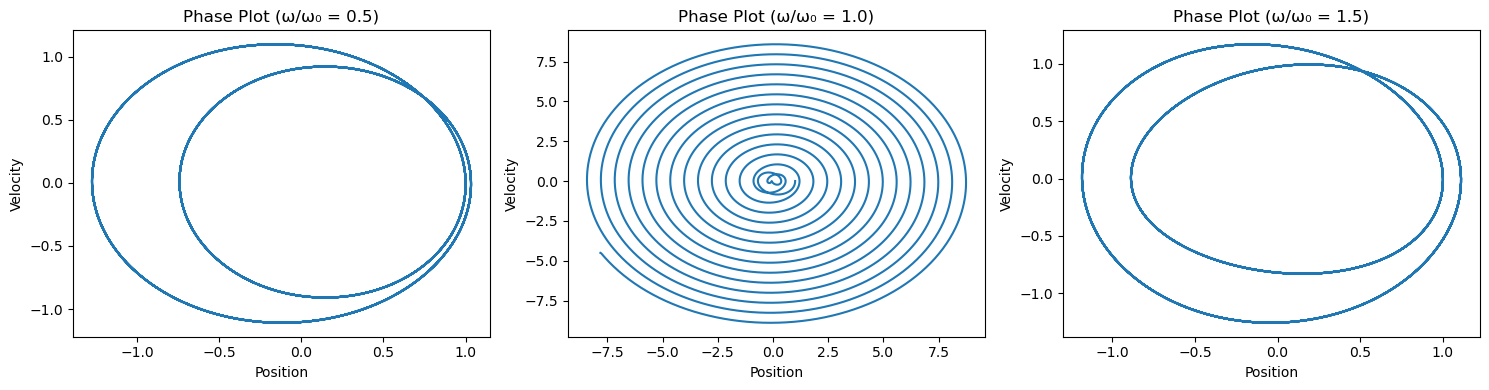

In [11]:
fig = src.phase.visualize_phase_plots(resonance_results)
plt.show()

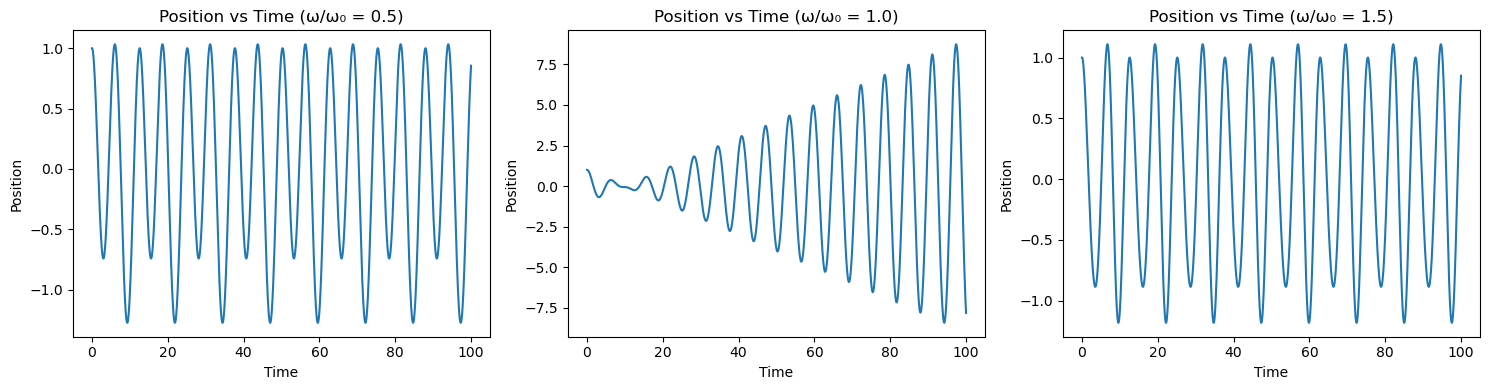

In [12]:
fig = src.phase.visualize_position_time_plots(resonance_results)
plt.show()